# Data Cleaning and Preparation

**Project**: Support Operations Optimization  
**Author**: Darshana Rokade (Project Lead)  
**Date**: March 2025

## Objective
Clean and prepare synthetic support case data for analysis

## My Contributions
- Data validation and quality checks
- Handling missing values and outliers
- Feature engineering for analysis
- Export cleaned dataset for downstream analysis

**Team Context**: This analysis was developed as part of a team project, with this notebook representing my individual technical contribution to data preparation.

In [47]:
"""
Data Cleaning Pipeline
Author: Darshana Rokade
Last Updated: December 2025
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns and first 100 rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Visualization aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully")


Libraries imported successfully


## Step 1: Load the Dataset

We'll start by loading the synthetic dataset and understanding its structure:
- Number of rows and columns
- Data types of each column
- First and last few rows for a quick preview


In [48]:
# First, we need to load the dataset into Google Colab.

# Load the cleaned CSV (uploaded to Colab)
from google.colab import files

uploaded = files.upload()  # select 'synthetic_case_data.csv' from your laptop

# Read dataset as DataFrame
dataset = pd.read_csv('synthetic_case_data.csv', low_memory=False)
print(f"Dataset Shape: {dataset.shape}\n")
dataset.head()


Saving synthetic_case_data.csv to synthetic_case_data (2).csv
Dataset Shape: (1200, 18)



,Dat,Site Name,Status,Priority,Severity,Screen Status,State,Case status,Type,Category,Reported Issue,Resolution,Queue Name,Region,Market,Creation Time,Last Update Time,Resolution time
0,1880000,KNCC Cinescape Avenues,Resolved,Major,High (Major),UP,Netherlands,Resolved,Email Request,Screen Corridor,INTERMITTENT AUDIO,Recalibrated System,Future Work,EMEA,Market-France-ADDE-CDS,2/22/2025 14:27,2/22/2025 14:27,0
1,1880001,Pathe Nice Gare Du Sud,Solving,Critical,High (Critical),UP,England,Solving,Email Request,Automation,Application Not Responding,Power cycled / Reboot Server,Future Work,EMEA,Market-Saudi Arabia,7/18/2025 14:27,7/18/2025 14:27,0
2,1880002,AMC Dine-In Thoroughbred 20 - 4457,Under Review,Critical,High (Critical),DOWN,KY,Under Review,Web Support,Projector,Booth Temperature Issue,Replaced Component,EM3 Issues,Americas,Market-NJ,3/7/2025 14:27,3/7/2025 14:27,0
3,1880003,CGV Shanghai Fudi,Solving,Minor,Medium (Minor),UP,Korea,Solving,Email Request,Screen Corridor,UPS Issue,Network Configuration Fixed,APAC Dispatched,APAC,Market-Hong Kong,3/1/2025 14:27,3/1/2025 14:27,0
4,1880004,Cinemark Century City,Solving,Critical,High (Critical),UP,TN,Solving,Email Request,Screen Corridor,IMPROPER AUDIO LEVEL,Firmware Updated,CSE Dispatched,Americas,Market-COLOH,2/10/2025 14:27,2/10/2025 14:27,0


## Step 2: Data Understanding
We'll explore key characteristics:
- Dataset size
- Data types of features
- Unique values in categorical columns
- Date columns conversion


In [49]:
# Dataset dimensions
print(f"Number of rows: {dataset.shape[0]}")
print(f"Number of columns: {dataset.shape[1]}\n")

# Data types
print(dataset.info())

# Summary statistics for numerical columns
dataset.describe()


Number of rows: 1200
Number of columns: 18

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Dat               1200 non-null   int64 
 1   Site Name         1200 non-null   object
 2   Status            1200 non-null   object
 3   Priority          1200 non-null   object
 4   Severity          1200 non-null   object
 5   Screen Status     1200 non-null   object
 6   State             1200 non-null   object
 7   Case status       1200 non-null   object
 8   Type              1200 non-null   object
 9   Category          1200 non-null   object
 10  Reported Issue    1200 non-null   object
 11  Resolution        1200 non-null   object
 12  Queue Name        1200 non-null   object
 13  Region            1200 non-null   object
 14  Market            1200 non-null   object
 15  Creation Time     1200 non-null   object
 16  Last Update Time

,Dat,Resolution time
count,1.200000e+03,1200.000000
mean,1.880600e+06,0.482500
std,3.465545e+02,1.210061
min,1.880000e+06,0.000000
25%,1.880300e+06,0.000000
50%,1.880600e+06,0.000000
75%,1.880899e+06,1.000000
max,1.881199e+06,19.000000


In [50]:
# Identify unique values for key categorical features
categorical_cols = ['Region', 'Category', 'State', 'Priority', 'Severity']
for col in categorical_cols:
    print(f"{col} unique values: {dataset[col].unique()}\n")


Region unique values: ['EMEA' 'Americas' 'APAC']

Category unique values: ['Screen Corridor' 'Automation' 'Projector' 'Qalif' 'Audio' 'Facility'
 'Network' 'Screen / Masking']

State unique values: ['Netherlands' 'England' 'KY' 'Korea' 'TN' 'France' 'China' 'Japan'
 'Kuwait' 'Thailand' 'Singapore' 'TX' 'NJ' 'NY' 'Germany' 'CA' 'OH']

Priority unique values: ['Major' 'Critical' 'Minor' 'Informational']

Severity unique values: ['High (Major)' 'High (Critical)' 'Medium (Minor)' 'Medium (Major)'
 'Low (Minor)']



## Step 3: Convert Dates

Convert creation and update timestamps to datetime format for easier analysis.


In [51]:
dataset['Creation Time'] = pd.to_datetime(dataset['Creation Time'])
dataset['Last Update Time'] = pd.to_datetime(dataset['Last Update Time'])

# Verify conversion
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Dat               1200 non-null   int64         
 1   Site Name         1200 non-null   object        
 2   Status            1200 non-null   object        
 3   Priority          1200 non-null   object        
 4   Severity          1200 non-null   object        
 5   Screen Status     1200 non-null   object        
 6   State             1200 non-null   object        
 7   Case status       1200 non-null   object        
 8   Type              1200 non-null   object        
 9   Category          1200 non-null   object        
 10  Reported Issue    1200 non-null   object        
 11  Resolution        1200 non-null   object        
 12  Queue Name        1200 non-null   object        
 13  Region            1200 non-null   object        
 14  Market            1200 n

## Step 4: Data Quality Checks
- Check for missing values
- Check for duplicates
- Drop duplicate rows


In [52]:
# Check for missing values
print("Missing values per column:\n")
print(dataset.isnull().sum(), "\n")

# Check duplicates
print(f"Duplicate rows: {dataset.duplicated().sum()}\n")

# Remove duplicates
dataset.drop_duplicates(inplace=True)
print(f"Dataset shape after dropping duplicates: {dataset.shape}")


Missing values per column:

Dat                 0
Site Name           0
Status              0
Priority            0
Severity            0
Screen Status       0
State               0
Case status         0
Type                0
Category            0
Reported Issue      0
Resolution          0
Queue Name          0
Region              0
Market              0
Creation Time       0
Last Update Time    0
Resolution time     0
dtype: int64 

Duplicate rows: 0

Dataset shape after dropping duplicates: (1200, 18)


## Step 5: Feature Engineering & Filtering
- Remove closed cases for certain analyses
- Prepare additional metrics if needed


In [53]:
# Filter out closed cases if needed
df_filtered = dataset[dataset['Status'] != 'Closed']

# Example: Create a new column for resolution duration in hours
df_filtered['Resolution time (hrs)'] = df_filtered['Resolution time'] * 24

# Preview
df_filtered.head()


/tmp/ipython-input-3167761677.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Resolution time (hrs)'] = df_filtered['Resolution time'] * 24


,Dat,Site Name,Status,Priority,Severity,Screen Status,State,Case status,Type,Category,Reported Issue,Resolution,Queue Name,Region,Market,Creation Time,Last Update Time,Resolution time,Resolution time (hrs)
0,1880000,KNCC Cinescape Avenues,Resolved,Major,High (Major),UP,Netherlands,Resolved,Email Request,Screen Corridor,INTERMITTENT AUDIO,Recalibrated System,Future Work,EMEA,Market-France-ADDE-CDS,2025-02-22 14:27:00,2025-02-22 14:27:00,0,0
1,1880001,Pathe Nice Gare Du Sud,Solving,Critical,High (Critical),UP,England,Solving,Email Request,Automation,Application Not Responding,Power cycled / Reboot Server,Future Work,EMEA,Market-Saudi Arabia,2025-07-18 14:27:00,2025-07-18 14:27:00,0,0
2,1880002,AMC Dine-In Thoroughbred 20 - 4457,Under Review,Critical,High (Critical),DOWN,KY,Under Review,Web Support,Projector,Booth Temperature Issue,Replaced Component,EM3 Issues,Americas,Market-NJ,2025-03-07 14:27:00,2025-03-07 14:27:00,0,0
3,1880003,CGV Shanghai Fudi,Solving,Minor,Medium (Minor),UP,Korea,Solving,Email Request,Screen Corridor,UPS Issue,Network Configuration Fixed,APAC Dispatched,APAC,Market-Hong Kong,2025-03-01 14:27:00,2025-03-01 14:27:00,0,0
4,1880004,Cinemark Century City,Solving,Critical,High (Critical),UP,TN,Solving,Email Request,Screen Corridor,IMPROPER AUDIO LEVEL,Firmware Updated,CSE Dispatched,Americas,Market-COLOH,2025-02-10 14:27:00,2025-02-10 14:27:00,0,0


## Step 6: Exploratory Visualization
- Pairplots for numeric relationships
- Distribution of resolution time by region
- Priority vs. Resolution time


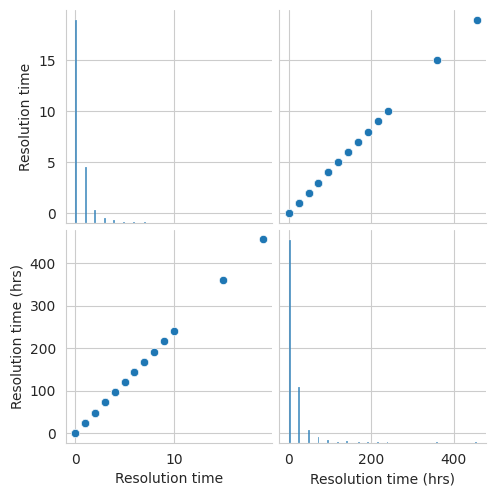

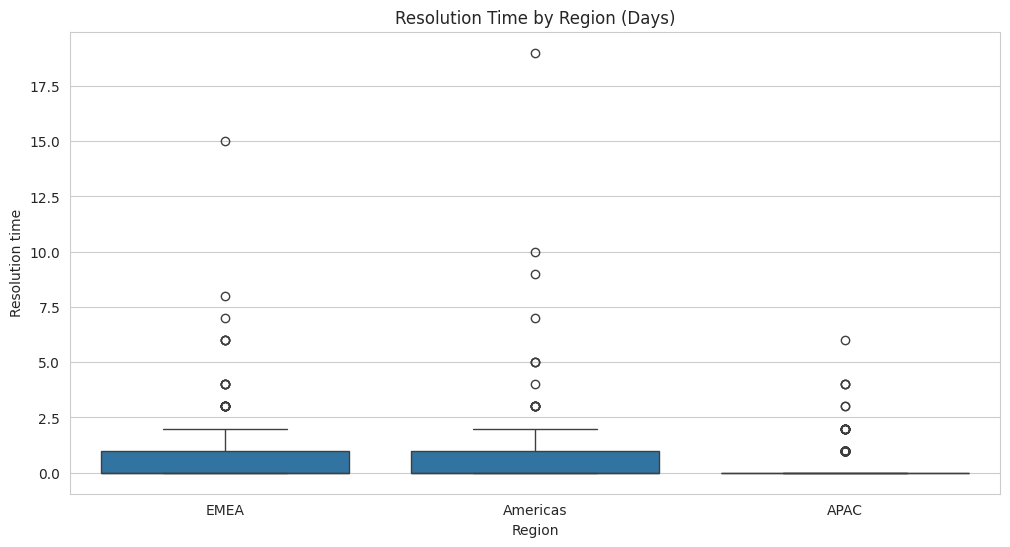

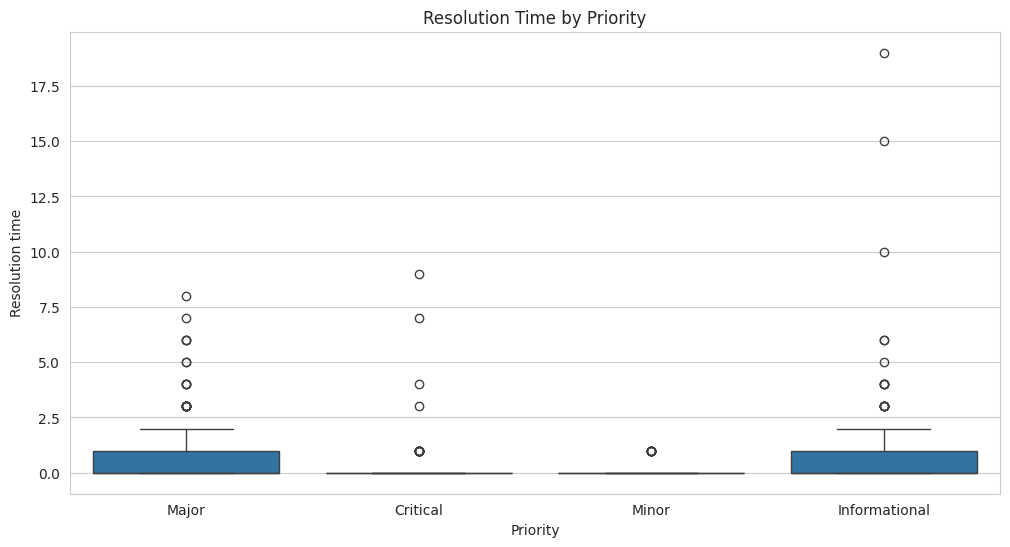

In [54]:
# Pairplot (for numeric columns)
sns.pairplot(df_filtered[['Resolution time', 'Resolution time (hrs)']])
plt.show()

# Boxplot by Region
sns.boxplot(x='Region', y='Resolution time', data=df_filtered)
plt.title("Resolution Time by Region (Days)")
plt.show()

# Boxplot by Priority
sns.boxplot(x='Priority', y='Resolution time', data=df_filtered)
plt.title("Resolution Time by Priority")
plt.show()


## Step 7: Save Preprocessed Dataset
The cleaned and filtered dataset is saved for downstream analysis and reproducibility.


In [55]:
# Save cleaned dataset locally in Colab
cleaned_file = 'synthetic_case_data_cleaned.csv'
dataset.to_csv(cleaned_file, index=False)

# Download to local machine
files.download(cleaned_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>